In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [38]:
fashion_train_data = pd.read_csv('./fashion-mnist_train.csv', sep= ',')

In [39]:
fashion_test_data = pd.read_csv('./fashion-mnist_test.csv', sep= ',')

In [40]:
fashion_train_data.shape

(60000, 785)

In [41]:
fashion_test_data.shape

(10000, 785)

In [42]:
training = np.array(fashion_train_data, dtype='float32')
testing = np.array(fashion_test_data, dtype='float32')

In [43]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Labels for Training and Test Examples

Each training and test example is assigned to one of the following labels:

| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |


1

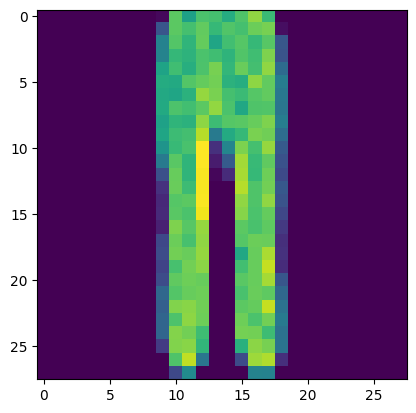

In [45]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i, 0]
int(label)

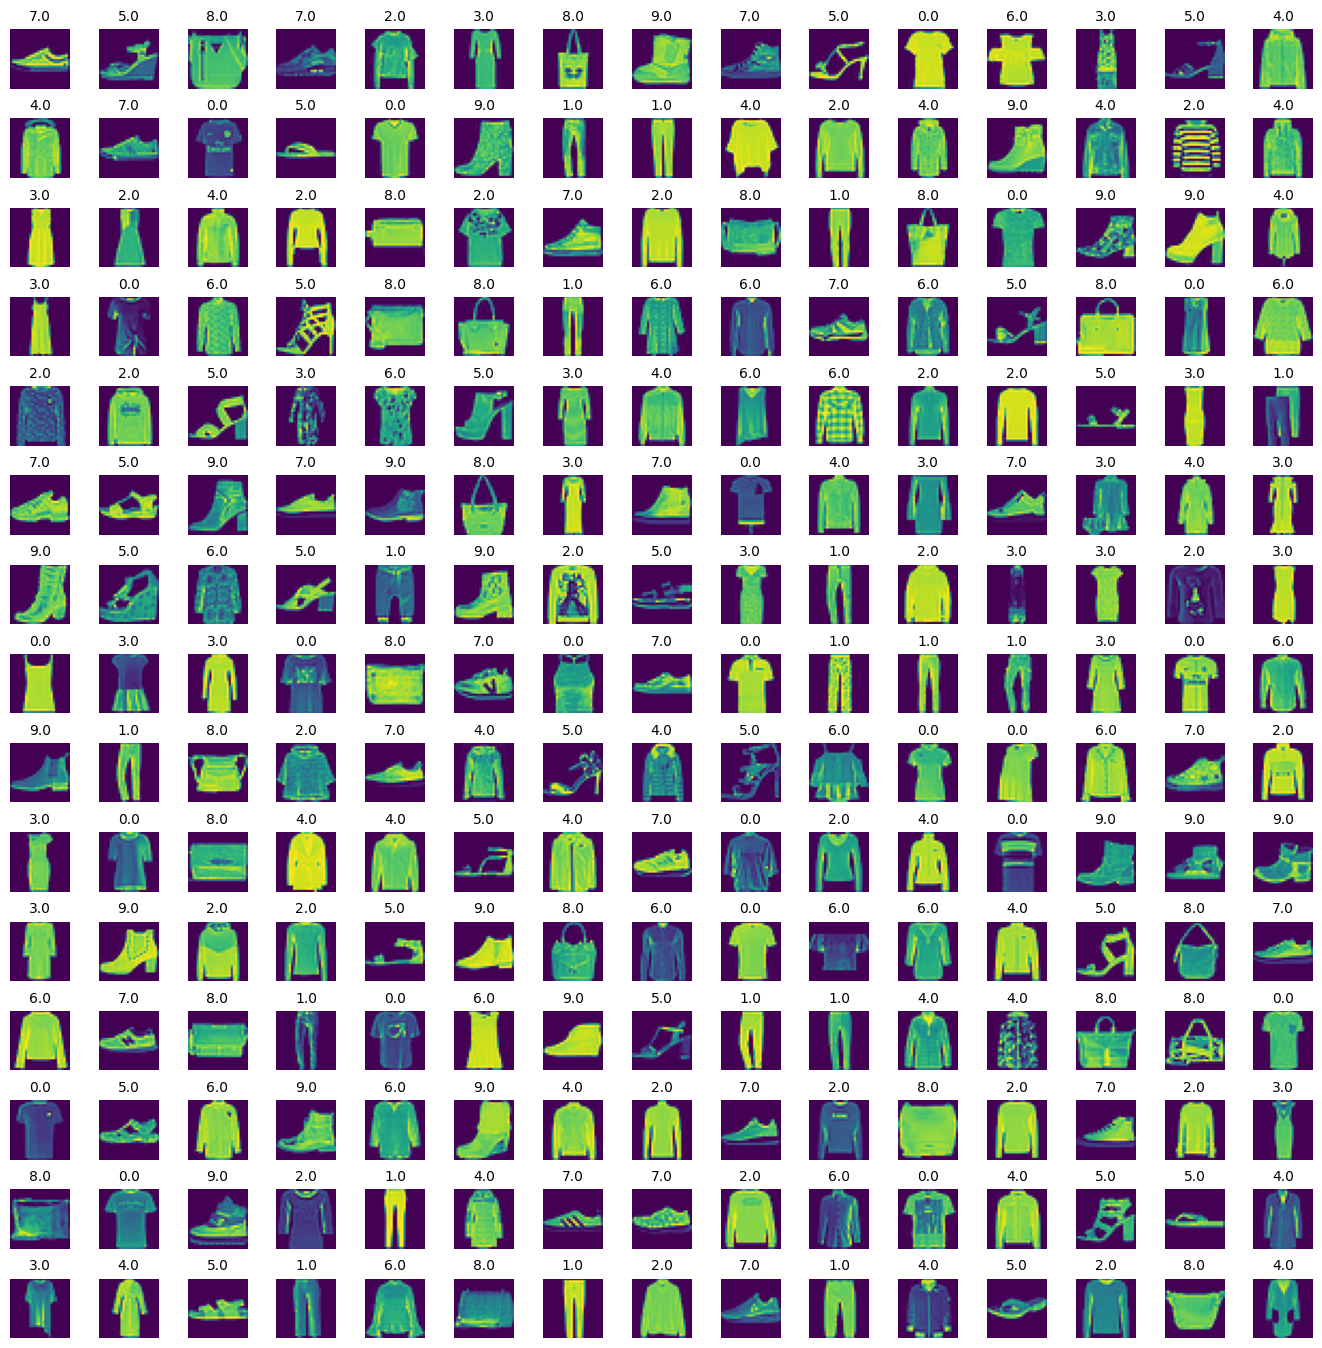

In [46]:
W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel()

n_training = len(training)


for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index, 0], fontsize=10)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

In [47]:
X_train = training[:, 1:]/255
Y_train = training[:, 0] 

In [48]:
X_test = testing[:, 1:]/255
Y_test = testing[:, 0] 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=12345)

In [51]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], * (28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28,28,1))

In [52]:
X_validate.shape

(12000, 28, 28, 1)

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [54]:
CNN_model = Sequential([
    Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)), 
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='sigmoid')
])

c:\Users\ijona\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
CNN_model.compile(
    loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']
)

In [64]:
epochs=50

In [65]:
CNN_model.fit(X_train,Y_train,
              batch_size=512,
              epochs=epochs,
              verbose=1,
              validation_data=(X_validate, Y_validate))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8776 - loss: 0.3422 - val_accuracy: 0.8643 - val_loss: 0.3751
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8764 - loss: 0.3407 - val_accuracy: 0.8677 - val_loss: 0.3702
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8759 - loss: 0.3403 - val_accuracy: 0.8619 - val_loss: 0.3757
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8776 - loss: 0.3391 - val_accuracy: 0.8673 - val_loss: 0.3722
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8767 - loss: 0.3368 - val_accuracy: 0.8675 - val_loss: 0.3694
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8754 - loss: 0.3414 - val_accuracy: 0.8687 - val_loss: 0.3674
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8770 - loss: 0.3377 - val_accuracy: 0.8681 - val_loss: 0.3677
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8780 - loss: 0.3356 - val_accuracy: 0.8652 - val_loss:

Model Performance Evaluation Guidelines:

Above 90%:

Generally considered very good, especially for complex problems.

80-90%:

Solid performance, suitable for many practical applications.

70-80%:

Acceptable performance, depending on the problem complexity and application requirements.

Below 70%:

Might need improvement, especially if higher accuracy is crucial for your task.

In [69]:
evaluation= CNN_model.evaluate(X_test, Y_test)  
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8703 - loss: 0.3399
Test Accuracy: 0.877


In [70]:
predictions = CNN_model.predict(X_test)
predict_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


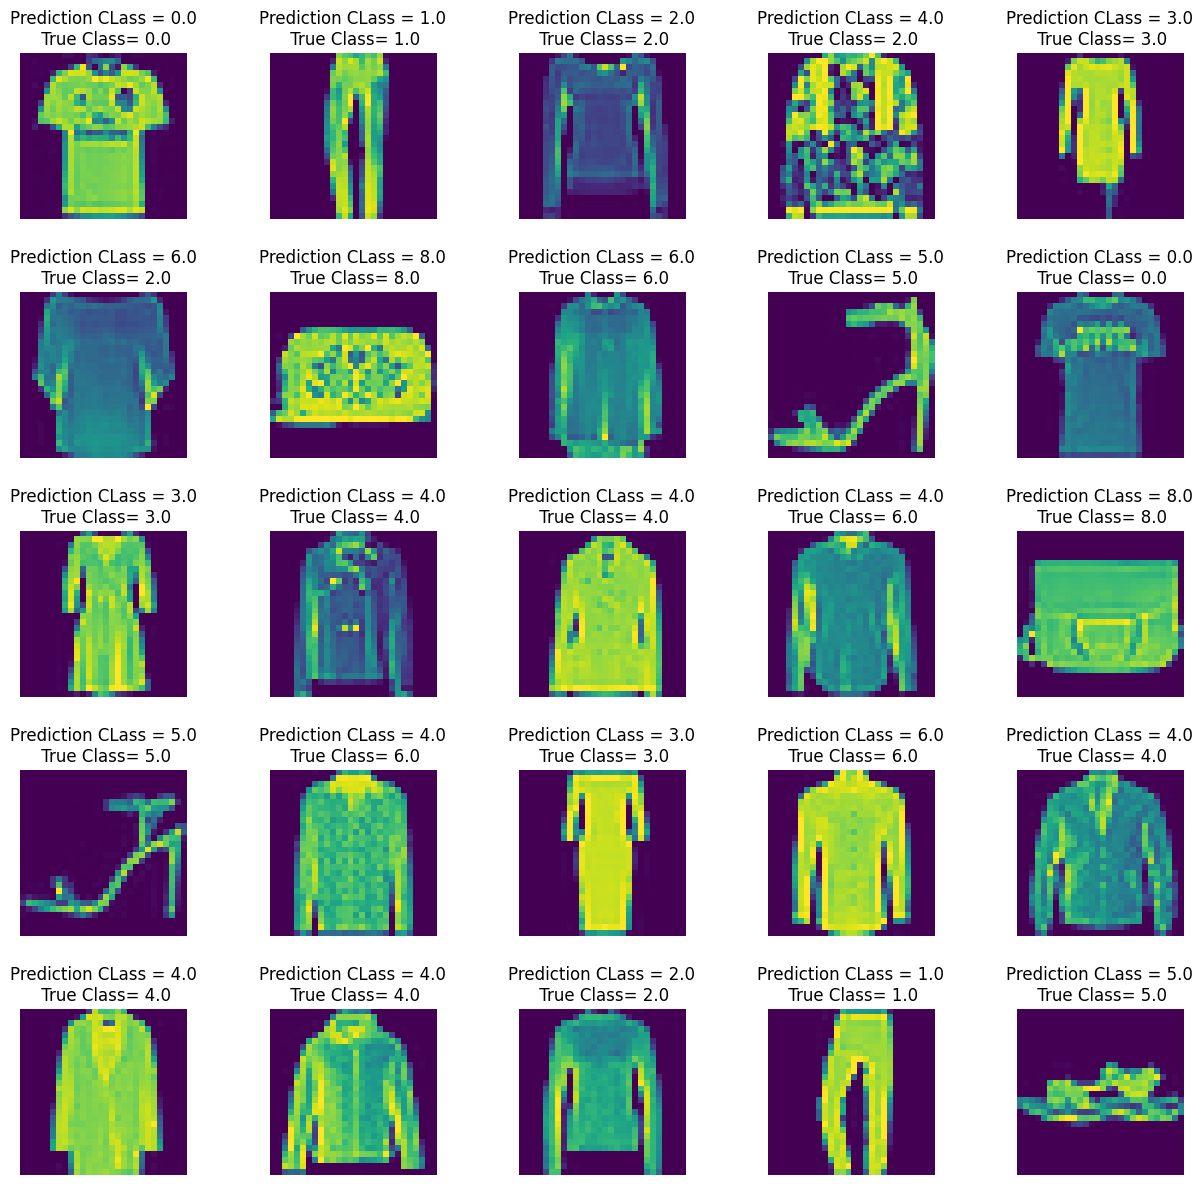

In [72]:
L= 5
W= 5

fig, axes = plt.subplots(L, W, figsize=(15,15))
axes= axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction CLass = {:.1f}\n True Class= {:.1f}".format(predict_classes[i], Y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)    

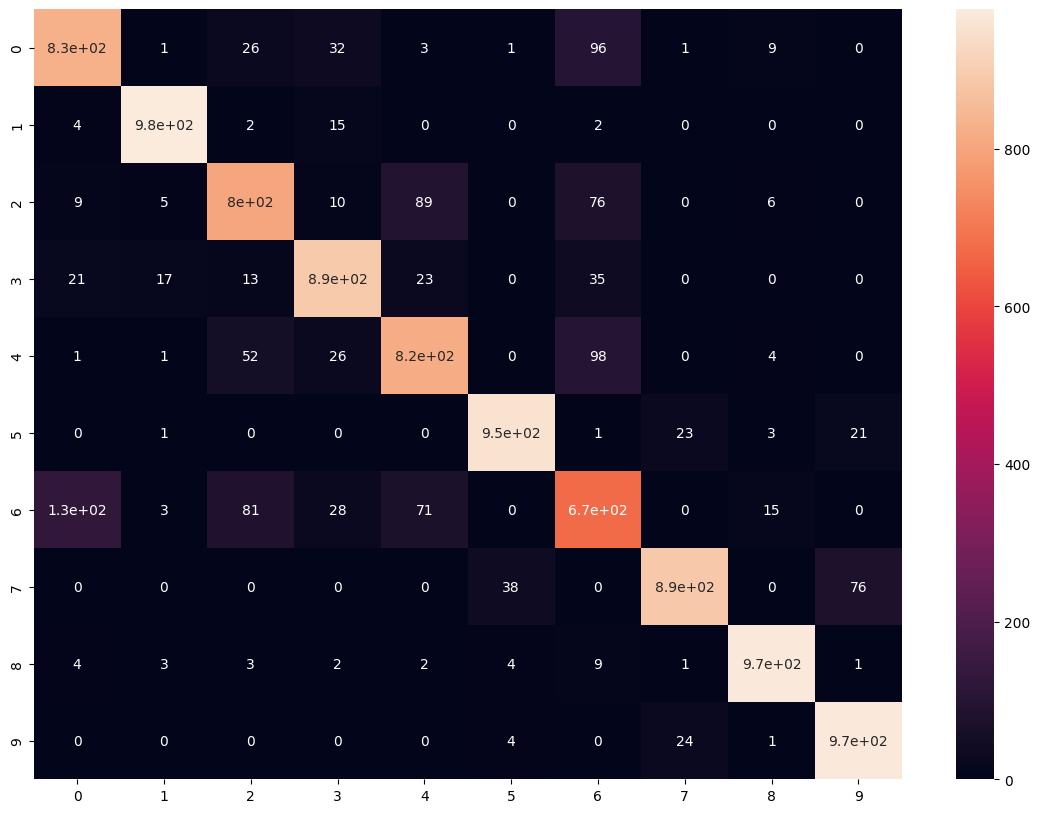

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predict_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True);

In [75]:
from sklearn.metrics import classification_report

num_classes = 10
traget_names = [" Class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_test, predict_classes, target_names= traget_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.82      0.81      0.81      1000
     Class 3       0.89      0.89      0.89      1000
     Class 4       0.81      0.82      0.82      1000
     Class 5       0.95      0.95      0.95      1000
     Class 6       0.68      0.67      0.68      1000
     Class 7       0.95      0.89      0.92      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.91      0.97      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

